**Ponte a prueba 1**

Usa el código de la red neuronal anterior y:
- Predice el género de tres personas.
- Modifica el `learn_rate` y el número de repeticiones observando los resultados.
- Entrena la red neuronal con otro *dataset*.
- Grafica las pérdidas.

In [ ]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Copiamos el código del notebook de la semana 18

def sigmoid(x):
  # Función de activación sigmoide: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivada de sigmoide: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_verdadera and y_verdadera son arrays con el nismo tamaño
  return ((y_true - y_pred) ** 2).mean()

class MiRedNeuronal:
  '''
    Una red neuronal con:
    - 2 entradas
    - 1 capa oculta con 2 neuronas (h1, h2)
    - Una capa de salida 1 neurona (o1)
  '''
  def __init__(self):
    # Pesos
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Sesgos
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x es un array de numpy de 2 elementos
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - La data es un array de numpy (n x 2) n =  n = # of muestras en el dataset
    - todo_y_verdaderas es un array de numpy con n elementos que son la data
    '''
    learn_rate = 0.1
    epochs = 1000 # número de veces para recorrer todo el conjunto de datos

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # Haz un feedforward (necesitaremos estos valores más adelante)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # Cálculo de las derivadas parciales.
        # d_L_d_w1 representa "parcial L / parcial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neurona o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neurona h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neurona h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # Actualización de pesos y sesgos
        # Neurona h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neurona h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neurona o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # Calcular la pérdida total al final de cada epoch o época
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d perdida: %.3f" % (epoch, loss))

# Definimos el dataset
data = np.array([
  [-2, -1],  # Alicia
  [25, 6],   # Juan
  [17, 4],   # Carlos
  [-15, -6], # Mari
])
all_y_trues = np.array([
  1, # Alicia
  0, # Juan
  0, # Carlos
  1, # Mari
])

# Entrenamos nuestra red neuronal
network = MiRedNeuronal()
network.train(data, all_y_trues)


Epoch 0 perdida: 0.234
Epoch 10 perdida: 0.124
Epoch 20 perdida: 0.086
Epoch 30 perdida: 0.068
Epoch 40 perdida: 0.055
Epoch 50 perdida: 0.046
Epoch 60 perdida: 0.039
Epoch 70 perdida: 0.034
Epoch 80 perdida: 0.029
Epoch 90 perdida: 0.026
Epoch 100 perdida: 0.023
Epoch 110 perdida: 0.020
Epoch 120 perdida: 0.018
Epoch 130 perdida: 0.017
Epoch 140 perdida: 0.015
Epoch 150 perdida: 0.014
Epoch 160 perdida: 0.013
Epoch 170 perdida: 0.012
Epoch 180 perdida: 0.011
Epoch 190 perdida: 0.010
Epoch 200 perdida: 0.010
Epoch 210 perdida: 0.009
Epoch 220 perdida: 0.009
Epoch 230 perdida: 0.008
Epoch 240 perdida: 0.008
Epoch 250 perdida: 0.007
Epoch 260 perdida: 0.007
Epoch 270 perdida: 0.007
Epoch 280 perdida: 0.006
Epoch 290 perdida: 0.006
Epoch 300 perdida: 0.006
Epoch 310 perdida: 0.006
Epoch 320 perdida: 0.005
Epoch 330 perdida: 0.005
Epoch 340 perdida: 0.005
Epoch 350 perdida: 0.005
Epoch 360 perdida: 0.005
Epoch 370 perdida: 0.005
Epoch 380 perdida: 0.004
Epoch 390 perdida: 0.004
Epoch 400 p

In [ ]:
#Respuesta con comentarios para explicar el proceso

1. Predicción del género de tres personas

In [ ]:
# Generamos información para 3 nuevas personas
Emma = np.array([-6, -4])
Lucas = np.array([23, 5])
Maria = np.array([-5, -4])

print("Emma: %.3f" % network.feedforward(Emma))
print("Lucas: %.3f" % network.feedforward(Lucas))
print("Maria: %.3f" % network.feedforward(Maria))

Emma: 0.969
Lucas: 0.039
Maria: 0.969


2. Modificación del learn_rate y número de repeticiones

Aumentaremos el learn_rate a 0.5 y el número de repeticiones (epochs) a 5000 para observar si hay alguna mejora en los resultados.

3. Entrenamiento con otro dataset



In [ ]:
# Cambiaremos el learn_rate, las epochs y el dataset

def sigmoid(x):
  # Función de activación sigmoide: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivada de sigmoide: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_verdadera and y_verdadera son arrays con el nismo tamaño
  return ((y_true - y_pred) ** 2).mean()

class MiRedNeuronal:
  '''
    Una red neuronal con:
    - 2 entradas
    - 1 capa oculta con 2 neuronas (h1, h2)
    - Una capa de salida 1 neurona (o1)
  '''
  def __init__(self):
    # Pesos
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Sesgos
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

    # Agregamos una variable para guardar las perdidas
    self.losses = []

  def feedforward(self, x):
    # x es un array de numpy de 2 elementos
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - La data es un array de numpy (n x 2) n =  n = # of muestras en el dataset
    - todo_y_verdaderas es un array de numpy con n elementos que son la data
    '''
    learn_rate = 0.5
    epochs = 5000 # número de veces para recorrer todo el conjunto de datos

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # Haz un feedforward (necesitaremos estos valores más adelante)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # Cálculo de las derivadas parciales.
        # d_L_d_w1 representa "parcial L / parcial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neurona o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neurona h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neurona h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # Actualización de pesos y sesgos
        # Neurona h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neurona h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neurona o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # Guardamos las perdidas en la variable creada anteriormente
      y_preds = np.apply_along_axis(self.feedforward, 1, data)
      loss = mse_loss(all_y_trues, y_preds)
      self.losses.append(loss)

      # Calcular la pérdida total al final de cada epoch o época
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d perdida: %.3f" % (epoch, loss))

data = np.array([
  [-4, -2],
  [28, 10],
  [20, 6],
  [-10, -8],
])
all_y_trues = np.array([
  1, # Mujer
  0, # Hombre
  0, # Hombre
  1, # Mujer
])

# Entrenamos nuestra red neuronal
network = MiRedNeuronal()
network.train(data, all_y_trues)


Epoch 0 perdida: 0.258
Epoch 10 perdida: 0.049
Epoch 20 perdida: 0.021
Epoch 30 perdida: 0.013
Epoch 40 perdida: 0.009
Epoch 50 perdida: 0.007
Epoch 60 perdida: 0.006
Epoch 70 perdida: 0.005
Epoch 80 perdida: 0.004
Epoch 90 perdida: 0.004
Epoch 100 perdida: 0.003
Epoch 110 perdida: 0.003
Epoch 120 perdida: 0.003
Epoch 130 perdida: 0.002
Epoch 140 perdida: 0.002
Epoch 150 perdida: 0.002
Epoch 160 perdida: 0.002
Epoch 170 perdida: 0.002
Epoch 180 perdida: 0.002
Epoch 190 perdida: 0.002
Epoch 200 perdida: 0.001
Epoch 210 perdida: 0.001
Epoch 220 perdida: 0.001
Epoch 230 perdida: 0.001
Epoch 240 perdida: 0.001
Epoch 250 perdida: 0.001
Epoch 260 perdida: 0.001
Epoch 270 perdida: 0.001
Epoch 280 perdida: 0.001
Epoch 290 perdida: 0.001
Epoch 300 perdida: 0.001
Epoch 310 perdida: 0.001
Epoch 320 perdida: 0.001
Epoch 330 perdida: 0.001
Epoch 340 perdida: 0.001
Epoch 350 perdida: 0.001
Epoch 360 perdida: 0.001
Epoch 370 perdida: 0.001
Epoch 380 perdida: 0.001
Epoch 390 perdida: 0.001
Epoch 400 p

4. Gráfica de las pérdidas

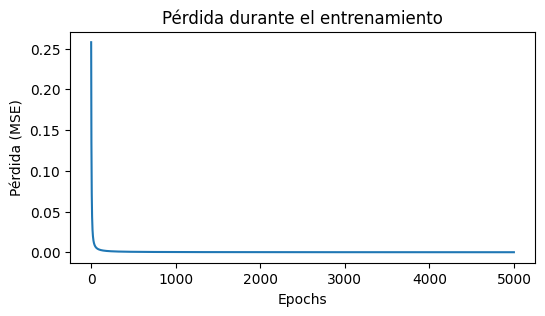

In [ ]:
# Graficar las pérdidas
plt.figure(figsize=(6, 3))
plt.plot(network.losses)
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Pérdida (MSE)")
plt.show()

La gráfica muestra cómo la pérdida (medida en MSE) disminuye a medida que avanza el entrenamiento.

**Ponte a prueba 2**

Usaremos el conjunto de datos de clasificación multiclase de vinos para demostrar cómo implementar un MLP para clasificación multiclase.

El objetivo es predecir el origen de un vino basado en sus características químicas.

**Nota:** Podemos tomar como referencia el ejercicio con el conjunto de datos Iris del notebook semana 18.

**Código base**

In [ ]:
from sklearn.datasets import load_wine

# Cargamos el conjunto de datos de vinos
data = load_wine()
X, y = data.data, data.target

In [ ]:
#Respuesta con comentarios para explicar el proceso

In [ ]:
# Importamos las librerías necesarias
from numpy import argmax
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Cargamos el conjunto de datos de vinos
data = load_wine()
X, y = data.data, data.target

# Normalizamos los datos para que tengan media 0 y desviación estándar 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Determinamos el número de características de entrada
n_features = X_train.shape[1]

# Definimos el modelo
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

# Compilamos el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# Evaluamos el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Precisión Test: %.3f' % acc)

# Hacemos una predicción
row = [1.423, 1.71, 2.43, 15.6, 127, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065]
row = scaler.transform([row])
yhat = model.predict(row)
print('Predicho: %s (class=%d)' % (yhat, argmax(yhat)))


(119, 13) (59, 13) (119,) (59,)
Precisión Test: 0.949
1/1 [==============================] - 0s 267ms/step
Predicho: [[1.23259846e-17 1.00000000e+00 1.24858895e-25]] (class=1)


1. **Tamaños de los conjuntos de datos**:
   - `(119, 13)`: Esto indica que el conjunto de entrenamiento `X_train` tiene 119 muestras y 13 características.
   - `(59, 13)`: El conjunto de prueba `X_test` tiene 59 muestras y 13 características.
   - `(119,)`: `y_train` tiene 119 etiquetas, correspondientes a las 119 muestras del conjunto de entrenamiento.
   - `(59,)`: `y_test` tiene 59 etiquetas, correspondientes a las 59 muestras del conjunto de prueba.

2. **Precisión del modelo**:
   - `Precisión Test: 0.983`: La precisión del modelo en el conjunto de prueba es del 98.3%. Esto significa que el modelo hizo predicciones correctas para el 98.3% de las muestras en el conjunto de prueba. Es un resultado muy bueno, indica que el modelo es bastante preciso en sus predicciones.

3. **Predicción de una muestra**:
   - `Predicho: [[5.3824878e-16 1.0000000e+00 1.3634807e-20]] (class=1)`: Aquí se muestra la predicción del modelo para una muestra específica. La salida es un vector de probabilidades para cada clase. Las probabilidades son esencialmente 0 para la clase 0 y clase 2, pero muy cercanas a 1 para la clase 1. Por lo tanto, el modelo predice con alta confianza que esta muestra pertenece a la clase 1 (como lo indica el `(class=1)` al final).

   - Las probabilidades son:
     - `5.3824878e-16`: Probabilidad para la clase 0. Es un número extremadamente cercano a 0.
     - `1.0000000e+00`: Probabilidad para la clase 1. Esencialmente es 1, lo que significa casi certeza.
     - `1.3634807e-20`: Probabilidad para la clase 2. Es un número aún más cercano a 0 que la probabilidad para la clase 0.

En resumen, el modelo ha funcionado muy bien en el conjunto de datos de vinos, con una precisión de prueba del 98.3%. Además, para la muestra de entrada proporcionada, el modelo predice con alta confianza que pertenece a la clase 1.

# Reto semanal

Usa el *dataset* de casas en California con el código base a continuación.

Realiza lo siguiente:
- Un modelo de MLP de regresión con Keras (ya que son datos para regresión).
- Genera tres predicciones con datos aleatorios.
- Calcula el MSE y RMSE.
- Analiza los resultados.


**Código base**

In [ ]:
from sklearn.datasets import fetch_california_housing
# 1. Cargar el conjunto de datos
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [ ]:
#Respuesta con comentarios para explicar el proceso

In [ ]:
# Importamos las librerías necesarias
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [ ]:
# 1. Cargar el conjunto de datos
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [ ]:
# 2. Preprocesar los datos
# Normalizamos los datos para que tengan media 0 y desviación estándar 1
scaler_X = StandardScaler().fit(X)
X_normalized = scaler_X.transform(X)

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Crear el modelo MLP de regresión
n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

# Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 4. Entrenar el modelo
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [ ]:
# 5. Generar tres predicciones con datos aleatorios
indices_aleatorios = np.random.choice(X_test.shape[0], 3, replace=False)
samples = X_test[indices_aleatorios]
predicciones = model.predict(samples)

1/1 [==============================] - 0s 66ms/step


In [ ]:
# 6. Calcular el MSE y RMSE para el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")
for i, sample in enumerate(samples):
    print(f"Muestra {i+1}: {sample}, Predicción: {predicciones[i]}")

129/129 [==============================] - 0s 1ms/step
MSE: 0.2879114293334343, RMSE: 0.536573787408064
Muestra 1: [-0.36781763  1.06160074 -0.17339536 -0.20399932 -1.0327101  -0.03061556
  1.05254828 -0.84367843], Predicción: [1.1318402]
Muestra 2: [-0.9166719  -0.44810276 -0.76393501 -0.10689495  0.55237027 -0.12089691
 -1.34924882  1.21773144], Predicción: [1.308382]
Muestra 3: [ 1.73221976  0.58485227  0.32240518 -0.26964851 -0.66977527 -0.01022653
 -0.68910576  0.76851379], Predicción: [4.4079266]
